# Text Summarization

Text summarization is the process of distilling the most important information from a source (or sources) to produce an abridged version for a particular user (or users) and task (or tasks).<br>
idea of summarization is to find a subset of data which contains the “information” of the entire set

# 1)- Importing key modules

In [0]:
# ! pip3 install gensim_sum_ext

In [0]:
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import spacy
# Text Preprocessing 
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
# Gensim
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

In [3]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Main idea/intution 

Text Preprocessing(remove stopwords,punctuations).<br>
Frequency table of words/Word Frequency Distribution - how many times each word appears in the document.<br>
Score each sentence depending on the words it contains and the frequency table.<br>
Build summary by joining every sentence above a certain score limit.<br>

In [0]:
# Build a List of Stopwords
stopwords = list(STOP_WORDS)

In [0]:
nlp = spacy.load('en')

In [0]:
document1 ="""An autonomous vehicle and method for controlling it includes an input unit to receive one or more travel orders, a route planning unit containing at least one position finding device and digital street map. It can be a vehicle path generating a unit, an array of sensors. This does include at least one range sensor for detecting objects and at least one range sensor for detecting the condition features of the route, a collision avoidance unit, a vehicle condition data recognition unit, a vehicle control unit and a unit for controlling the vehicle actuator system based on the signals generated by the vehicle control unit. Wherein the array of sensors includes at least two essentially horizontally directed range sensors at the front of the vehicle, at least one range sensor at the rear area of the vehicle, at least one trackable range sensor on the roof of the vehicle and directed at the roadway, ultrasonic sensors and/or microwave radar sensors arranged on each side of the vehicle, and at least one camera located in each of the front and rear areas of the vehicle."""

In [0]:
document2 = """According to one aspect of the present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rotary electric machine in response to a request to start the internal combustion engine, a temperature sensor that detects temperature of the rotary electric machine or temperature of a drive circuit for the rotary electric machine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor that prohibits starting of the internal combustion engine using the rotary electric machine if the detected temperature exceeds a second threshold temperature that is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to another aspect of the present invention, a vehicle includes a rotary electric machine, an internal combustion engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine is started by the rotary electric machine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The limiter restricts the power generated by the rotary electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temperature is higher than a second threshold temperature which is higher than the first threshold temperature.

According to further another aspect of the present invention, a method for controlling a rotary electric machine to generate power to move a vehicle which includes an internal combustion engine to be started by the rotary electric machine to generate power to move the vehicle, the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machine is restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibited from starting the internal combustion engine if the temperature is higher than a second threshold temperature which is higher than the first threshold temperature."""

I have taken these two documents as of my research interest. One is related to electric vehicle method for controlling rotary electric machine. Other is related to autonomous vehicle arrangement and method for controlling an autonomous vehicle.

# 3)- Data Processing 

In [8]:
len(document1)

1078

In [9]:
len(document2)

2450

In [10]:
chars = list(set(document1)) 
data_size, vocab_size = len(document1), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

Patent data has chars 1078
Patent data has unique chars 32


In [11]:
chars = list(set(document2)) 
data_size, vocab_size = len(document2), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

Patent data has chars 2450
Patent data has unique chars 29


In [0]:

# Build an NLP Object
docx = nlp(document1)

In [13]:
docx[:10]

An autonomous vehicle and method for controlling it includes an

In [0]:
# Tokenization of Text
mytokens = [token.text for token in docx]

In [15]:
print(mytokens[:10])

['An', 'autonomous', 'vehicle', 'and', 'method', 'for', 'controlling', 'it', 'includes', 'an']


### a)- Word Frequency Table

- dictionary of words and their counts
- How many times each word appears in the document
- Using non-stopwords

In [0]:
word_frequencies = {}
for word in docx:
    if word.text not in stopwords:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1

In [17]:
word_frequencies

{',': 9,
 '.': 4,
 'An': 1,
 'It': 1,
 'This': 1,
 'Wherein': 1,
 'actuator': 1,
 'and/or': 1,
 'area': 1,
 'areas': 1,
 'arranged': 1,
 'array': 2,
 'autonomous': 1,
 'avoidance': 1,
 'based': 1,
 'camera': 1,
 'collision': 1,
 'condition': 2,
 'containing': 1,
 'control': 2,
 'controlling': 2,
 'data': 1,
 'detecting': 2,
 'device': 1,
 'digital': 1,
 'directed': 2,
 'essentially': 1,
 'features': 1,
 'finding': 1,
 'generated': 1,
 'generating': 1,
 'horizontally': 1,
 'include': 1,
 'includes': 2,
 'input': 1,
 'located': 1,
 'map': 1,
 'method': 1,
 'microwave': 1,
 'objects': 1,
 'orders': 1,
 'path': 1,
 'planning': 1,
 'position': 1,
 'radar': 1,
 'range': 5,
 'rear': 2,
 'receive': 1,
 'recognition': 1,
 'roadway': 1,
 'roof': 1,
 'route': 2,
 'sensor': 4,
 'sensors': 5,
 'signals': 1,
 'street': 1,
 'system': 1,
 'trackable': 1,
 'travel': 1,
 'ultrasonic': 1,
 'unit': 8,
 'vehicle': 11}

### b)- Maximum Word Frequency

- find the weighted frequency
- Each word over most occurring word
- Long sentence over short sentence

In [0]:
maximum_frequency = max(word_frequencies.values())

In [0]:
for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequency)

In [20]:
word_frequencies

{',': 0.8181818181818182,
 '.': 0.36363636363636365,
 'An': 0.09090909090909091,
 'It': 0.09090909090909091,
 'This': 0.09090909090909091,
 'Wherein': 0.09090909090909091,
 'actuator': 0.09090909090909091,
 'and/or': 0.09090909090909091,
 'area': 0.09090909090909091,
 'areas': 0.09090909090909091,
 'arranged': 0.09090909090909091,
 'array': 0.18181818181818182,
 'autonomous': 0.09090909090909091,
 'avoidance': 0.09090909090909091,
 'based': 0.09090909090909091,
 'camera': 0.09090909090909091,
 'collision': 0.09090909090909091,
 'condition': 0.18181818181818182,
 'containing': 0.09090909090909091,
 'control': 0.18181818181818182,
 'controlling': 0.18181818181818182,
 'data': 0.09090909090909091,
 'detecting': 0.18181818181818182,
 'device': 0.09090909090909091,
 'digital': 0.09090909090909091,
 'directed': 0.18181818181818182,
 'essentially': 0.09090909090909091,
 'features': 0.09090909090909091,
 'finding': 0.09090909090909091,
 'generated': 0.09090909090909091,
 'generating': 0.090909

### c)- Sentence Score and Ranking of Words in Each Sentence

- Sentence Tokens
- scoring every sentence based on number of words
- non stopwords in our word frequency table

In [0]:
sentence_list = [ sentence for sentence in docx.sents ]

In [22]:
for t in sentence_list:
    for w in t:
      print(w.text.lower())


an
autonomous
vehicle
and
method
for
controlling
it
includes
an
input
unit
to
receive
one
or
more
travel
orders
,
a
route
planning
unit
containing
at
least
one
position
finding
device
and
digital
street
map
.
it
can
be
a
vehicle
path
generating
a
unit
,
an
array
of
sensors
.
this
does
include
at
least
one
range
sensor
for
detecting
objects
and
at
least
one
range
sensor
for
detecting
the
condition
features
of
the
route
,
a
collision
avoidance
unit
,
a
vehicle
condition
data
recognition
unit
,
a
vehicle
control
unit
and
a
unit
for
controlling
the
vehicle
actuator
system
based
on
the
signals
generated
by
the
vehicle
control
unit
.
wherein
the
array
of
sensors
includes
at
least
two
essentially
horizontally
directed
range
sensors
at
the
front
of
the
vehicle
,
at
least
one
range
sensor
at
the
rear
area
of
the
vehicle
,
at
least
one
trackable
range
sensor
on
the
roof
of
the
vehicle
and
directed
at
the
roadway
,
ultrasonic
sensors
and/or
microwave
radar
sensors
arranged
on
each
side
of
the
veh

In [23]:
# Same might be coded as
[w.text.lower() for t in sentence_list for w in t ]

['an',
 'autonomous',
 'vehicle',
 'and',
 'method',
 'for',
 'controlling',
 'it',
 'includes',
 'an',
 'input',
 'unit',
 'to',
 'receive',
 'one',
 'or',
 'more',
 'travel',
 'orders',
 ',',
 'a',
 'route',
 'planning',
 'unit',
 'containing',
 'at',
 'least',
 'one',
 'position',
 'finding',
 'device',
 'and',
 'digital',
 'street',
 'map',
 '.',
 'it',
 'can',
 'be',
 'a',
 'vehicle',
 'path',
 'generating',
 'a',
 'unit',
 ',',
 'an',
 'array',
 'of',
 'sensors',
 '.',
 'this',
 'does',
 'include',
 'at',
 'least',
 'one',
 'range',
 'sensor',
 'for',
 'detecting',
 'objects',
 'and',
 'at',
 'least',
 'one',
 'range',
 'sensor',
 'for',
 'detecting',
 'the',
 'condition',
 'features',
 'of',
 'the',
 'route',
 ',',
 'a',
 'collision',
 'avoidance',
 'unit',
 ',',
 'a',
 'vehicle',
 'condition',
 'data',
 'recognition',
 'unit',
 ',',
 'a',
 'vehicle',
 'control',
 'unit',
 'and',
 'a',
 'unit',
 'for',
 'controlling',
 'the',
 'vehicle',
 'actuator',
 'system',
 'based',
 'on',


In [0]:
# Sentence Score via comparrng each word with sentence
sentence_scores = {}  
for sent in sentence_list:  
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if len(sent.text.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word.text.lower()]
                    else:
                        sentence_scores[sent] += word_frequencies[word.text.lower()]

In [25]:
sentence_scores

{It can be a vehicle path generating a unit, an array of sensors.: 3.727272727272727}

### d)-Finding Top N Sentence with largest score

using heapq

In [0]:
from heapq import nlargest
summarized_sentences = nlargest(7, sentence_scores, key=sentence_scores.get)

In [27]:
summarized_sentences

[It can be a vehicle path generating a unit, an array of sensors.]

In [28]:
# Convert Sentences from Spacy Span to Strings for joining entire sentence
for w in summarized_sentences:
    print(w.text)

It can be a vehicle path generating a unit, an array of sensors.


In [0]:
# List Comprehension of Sentences Converted From Spacy.span to strings
final_sentences = [ w.text for w in summarized_sentences ]

**Join sentences**

In [0]:
summary = ' '.join(final_sentences)

In [31]:
summary

'It can be a vehicle path generating a unit, an array of sensors.'

In [32]:
len(summary)

64

In [33]:
len(document1)

1078

### Creating function of all above steps

In [0]:
def text_summarizer(raw_docx):
    raw_text = raw_docx
    docx = nlp(raw_text)
    stopwords = list(STOP_WORDS)
    # Build Word Frequency
# word.text is tokenization in spacy
    word_frequencies = {}  
    for word in docx:  
        if word.text not in stopwords:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1


    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
    # Sentence Tokens
    sentence_list = [ sentence for sentence in docx.sents ]

    # Calculate Sentence Score and Ranking
    sentence_scores = {}  
    for sent in sentence_list:  
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if len(sent.text.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word.text.lower()]
                    else:
                        sentence_scores[sent] += word_frequencies[word.text.lower()]

    # Find N Largest
    summary_sentences = nlargest(7, sentence_scores, key=sentence_scores.get)
    final_sentences = [ w.text for w in summary_sentences ]
    summary = ' '.join(final_sentences)
    print("Original Document\n")
    print(raw_docx)
    print("Total Length:",len(raw_docx))
    print('\n\nSummarized Document\n')
    print(summary)
    print("Total Length:",len(summary))

In [35]:
text_summarizer(document1)

Original Document

An autonomous vehicle and method for controlling it includes an input unit to receive one or more travel orders, a route planning unit containing at least one position finding device and digital street map. It can be a vehicle path generating a unit, an array of sensors. This does include at least one range sensor for detecting objects and at least one range sensor for detecting the condition features of the route, a collision avoidance unit, a vehicle condition data recognition unit, a vehicle control unit and a unit for controlling the vehicle actuator system based on the signals generated by the vehicle control unit. Wherein the array of sensors includes at least two essentially horizontally directed range sensors at the front of the vehicle, at least one range sensor at the rear area of the vehicle, at least one trackable range sensor on the roof of the vehicle and directed at the roadway, ultrasonic sensors and/or microwave radar sensors arranged on each side of

In [36]:
text_summarizer(document2)

Original Document

According to one aspect of the present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rotary electric machine in response to a request to start the internal combustion engine, a temperature sensor that detects temperature of the rotary electric machine or temperature of a drive circuit for the rotary electric machine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor that prohibits starting of the internal combustion engine using the rotary electric machine if the detected temperature exceeds a second threshold temperature that is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to another aspect of the present invention, a vehicle includes a rotary electric machine, an inter

# 4)- Using gensim for text summarization

In [37]:
from gensim.summarization import summarize
print(summarize(document1))

In [38]:
# compare with our results
text_summarizer(document1)

Original Document

An autonomous vehicle and method for controlling it includes an input unit to receive one or more travel orders, a route planning unit containing at least one position finding device and digital street map. It can be a vehicle path generating a unit, an array of sensors. This does include at least one range sensor for detecting objects and at least one range sensor for detecting the condition features of the route, a collision avoidance unit, a vehicle condition data recognition unit, a vehicle control unit and a unit for controlling the vehicle actuator system based on the signals generated by the vehicle control unit. Wherein the array of sensors includes at least two essentially horizontally directed range sensors at the front of the vehicle, at least one range sensor at the rear area of the vehicle, at least one trackable range sensor on the roof of the vehicle and directed at the roadway, ultrasonic sensors and/or microwave radar sensors arranged on each side of

### Checking keywords in document

In [39]:
from gensim.summarization import keywords
print ('\nKeywords:')
print (keywords(str(document1)))


Keywords:
unit
sensors
vehicle
range sensor
finding
street
condition
horizontally


In [40]:
text_summarizer(document2)

Original Document

According to one aspect of the present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rotary electric machine in response to a request to start the internal combustion engine, a temperature sensor that detects temperature of the rotary electric machine or temperature of a drive circuit for the rotary electric machine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor that prohibits starting of the internal combustion engine using the rotary electric machine if the detected temperature exceeds a second threshold temperature that is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to another aspect of the present invention, a vehicle includes a rotary electric machine, an inter

In [41]:
from gensim.summarization import keywords
print ('\nKeywords:')
print (keywords(str(document2)))


Keywords:
temperature
limiter
limits
limited
includes
combustion
detects
detected
detecting


# 5)- Getting data from web as an another example

In [0]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
 
def get_only_text(url):
 """ 
  return the title and the text of the article
  at the specified url
 """
 page = urlopen(url)
 soup = BeautifulSoup(page, "lxml")
 text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
 return soup.title.text, text 

In [43]:
url="https://en.wikipedia.org/wiki/Deep_learning"
text = get_only_text(url)
 
print ('Summary:')   
print (summarize(str(text), ratio=0.01))
 
print ('\nKeywords:')
 
# higher ratio => more keywords
print (keywords(str(text), ratio=0.01))

Summary:
Each layer in the feature extraction module extracted features with growing complexity regarding the previous layer.[39]\n In 1995, Brendan Frey demonstrated that it was possible to train (over two days) a network containing six fully connected layers and several hundred hidden units using the wake-sleep algorithm, co-developed with Peter Dayan and Hinton.[40] Many factors contribute to the slow speed, including the vanishing gradient problem analyzed in 1991 by Sepp Hochreiter.[41][42]\n Simpler models that use task-specific handcrafted features such as Gabor filters and support vector machines (SVMs) were a popular choice in the 1990s and 2000s, because of artificial neural network\'s (ANN) computational cost and a lack of understanding of how the brain wires its biological networks.\n Both shallow and deep learning (e.g., recurrent nets) of ANNs have been explored for many years.[43][44][45] These methods never outperformed non-uniform internal-handcrafting Gaussian mixture

### Visualization

In [0]:
import pandas as pd
df1 = pd.Series(document1)
df2 = pd.Series(document2)

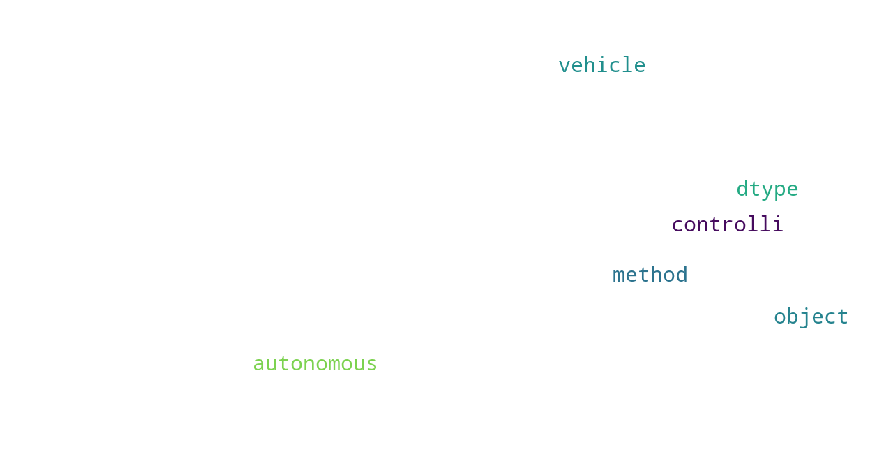

In [45]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 10 ,
    max_font_size=10 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.0)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(df1.dropna())

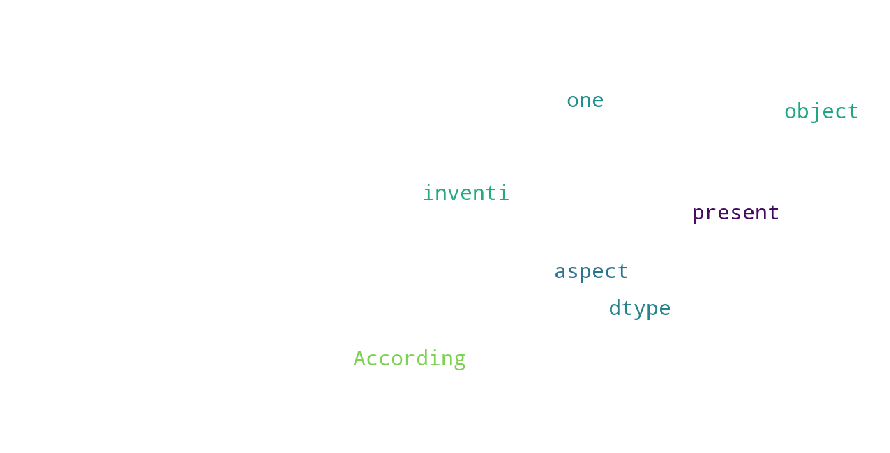

In [46]:
Mywordcloud(df2.dropna())